# SVM: Support Vector Machines (Maquinas de soporte vectorial)
## Historia:
Este tema lo desarrollo Vladimir Vapnic (Ruso) por alla en los 60s. Fue trabajo de tesis. Vladimir emigro a los Estados Unidos por alla en 1992. El tema era desconocido. El sometio 3 articulos
a la revista:

[Conference on Neural Information Processing Systems](https://en.wikipedia.org/wiki/Conference_on_Neural_Information_Processing_Systems)

pero los 3 fueron rechazados. El trabajaba en los laboratorios Bell y aposto con un colega a que el metodo de el (SVM) superaba
a los metodos tradicionales para predecir digitos, como MNIST.
Vapnic gano la apuesta. La implementacion original del metodo no era eficiente y aparecio Isabel Guyon (introdujo el llamado
"kernel trick" , la semana entrante lo explico) y el metodo se popularizo.

Cual es la idea que tenia Vapnik sobre lo que es SVM.

En regresion lineal se quiere hallar una recta que se ajuste a una nube de puntos. La funcion de costo para este problema es

$$J(a,b) = \frac{1}{2m} \sum_{i=1}^m [ y_i - (a x_i + b)]^2 $$
minimizar esta funcion de costo.

En SVM se quiere **maximizar** el "gap" entre los puntos de un lado y los puntos del otro.

La funcion de costo para este problema

$$J(a,b) = \frac{1}{2m} \sum_{i=1}^m d^2[ (x_i, y_i), L(a,b)] $$




Es importante en SVM entender el concepto de hiperplanos de separacion y vectores de soporte.

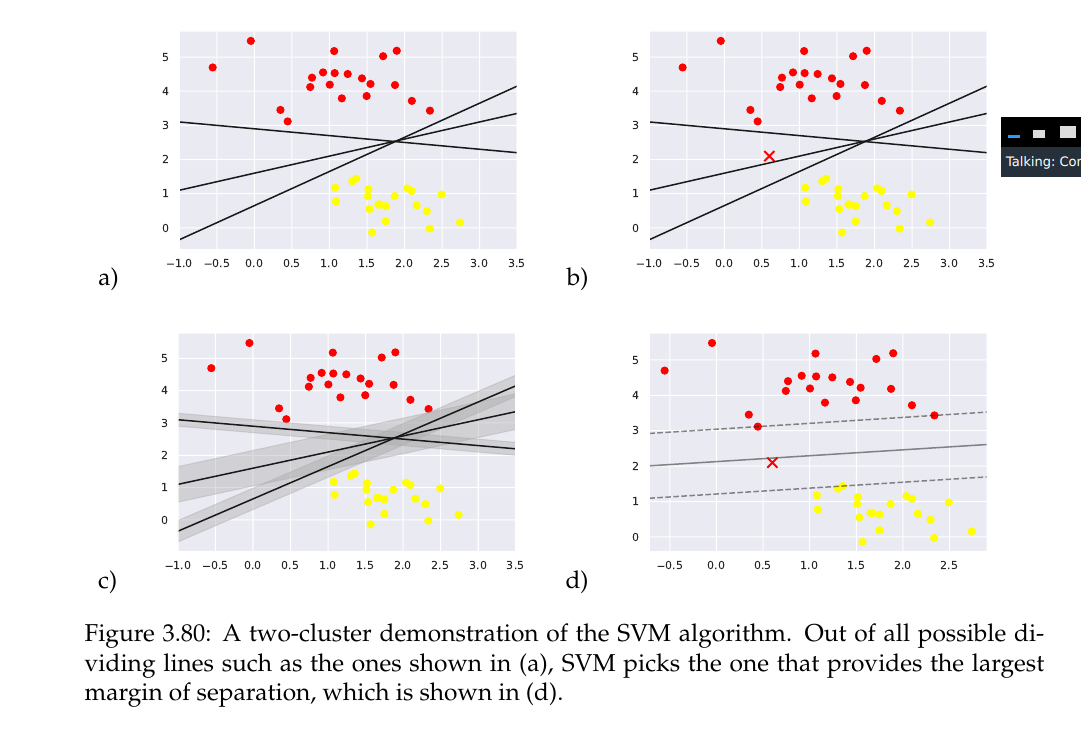

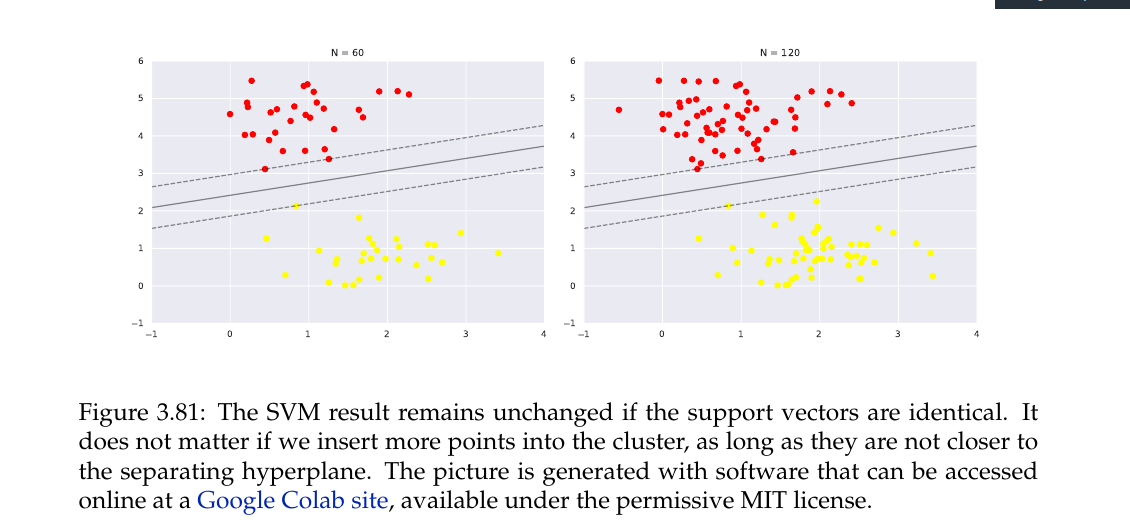

## Funcion de costo para el SVM.
Toca recordar un poco del algebra lineal como son
* Planos, hiperplano
* Normales a los planos
* Distancias a un plano.
(este fue un problema de una tarea al comienzo del semestre).

### Interpretacion geometrica:
Asumimos que tenemos una cantidad $m$ de puntos
$x^{(1)}, x^{(2)}, \cdots, x^{(m)} $
son **linealmente separables**. Es decir, que existe una linea que separa los puntos en dos grupos de distanta clase.
Pensemos en 2D por que es mas facil (pero esto se generaliza a cualquier numero de dimensiones). Los puntos pueden ser
$(x_1, x_2)^{(1)}, (x_1, x_2)^{(2)} , \cdots , (x_1, x_2)^{m} $
con etiquetas se nombran como $y^{(i)}$ con $i=1,2, \cdots, m$.
Como el problema es binario lo pensar como muestras $\oplus=1$
y $\ominus=-1$,

Para no complicarnos mucho la vida escojamos una grafica simple en 2D.

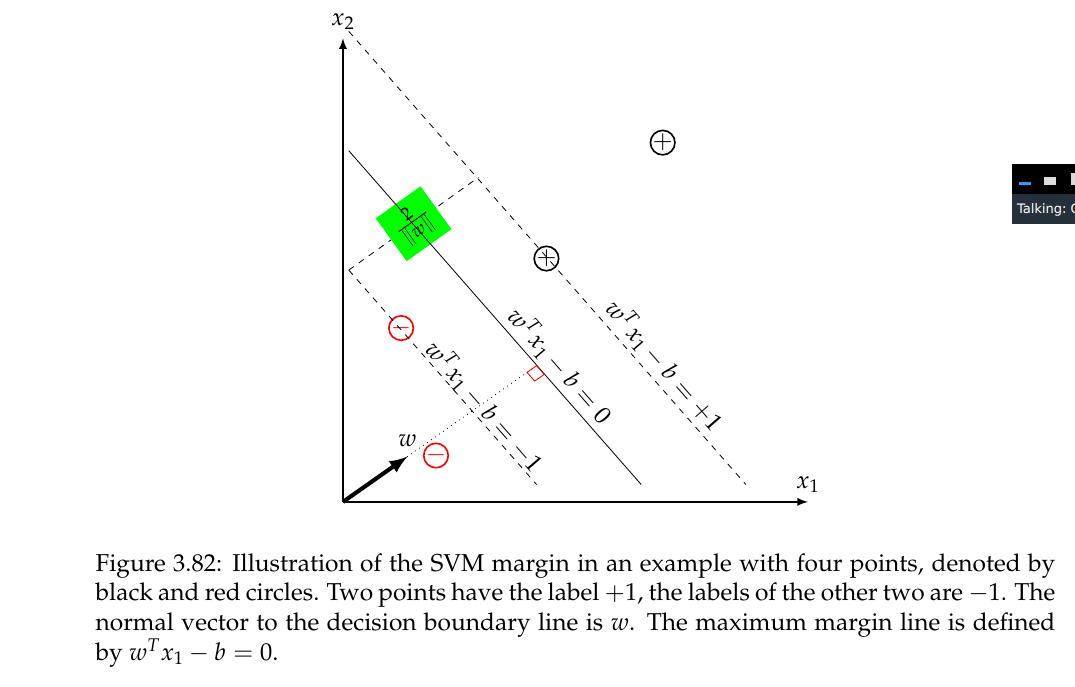

Pensemos en 2D donde el punto es $(x_1, x_2)$ con intercepto $b$ y pendiente $-a$.
El problema se escribe

\begin{eqnarray}
x_2 = a x_1 - b  \\
0 = a x_1 - x_2 - b \\
0 = \begin{pmatrix} a  \\ - 1 \end{pmatrix}^T \binom{x_1}{x_2}
- b
\end{eqnarray}

Esto lo podemos escribir como

$$0 = w^T x - b \tag{1}$$
donde

$$w = \binom{a}{-1} \quad x=\binom{x_1}{x_2} $$

Pero nada implide pensar que que $w$ este en espacio de $n$ dimensiones con $n > 2$.
De hecho la ecuacion (1) es la ecuacion de un plano ( o hiperplano si $n > 2$) donde $w$ es perpendicular al plano.
Esto lo vimos en una tarea al comienzo del semestre.



Tenemos que ese plano (1) lo vemos como el centro (eje), la linea
del medio. Pero existen dos lineas importanes a una distancia (por ahora $\delta$) de esta linea estas son


$$w^T x - b = \pm \delta $$

Entonces consideremos dos casos:

1. Los puntos positivos $x^{(i)}$ con $y^{(i)}=\oplus$. Tenemos que en esta zona (region, es la mitad del espacio). Pasa que


$$w^T x^{(i)} - b \ge 0   \quad , \quad y^{(i)}= 1 $$

2. Los puntos negativos $x^{(i)}$ con $y^{(i)}=\ominus$. Tenemos que en esta zona (region, es la mitad del espacio). Pasa que

$$w^T x^{(i)} - b < 0   \quad , \quad y^{(i)}= -1 $$

Pensemos que esta linea de decision es funcion de un parametro $\delta$ que separa la linea de los puntos.

Escribimos

1.  $$w^T x^{(i)} - b = \delta  \quad , \quad y^{(i)} = 1 \tag{2} $$


2.
$$w^T x^{(i)} - b = -\delta  \quad , \quad y^{(i)} = -1 \tag{3} $$

Estas son las ecuaciones de los planos que contienen los vectores de soporte.  Estas dos ecuaciones se pueden sintetizar en una sola.

$$y^{(i)}( w^T x^{(i)} - b) = \delta \tag{4} $$

De la tarea donde estudiamos los hiperplanos y su separacion encontramos que la **margen** entre estos dos planos (**gap**)
esta dada por

$$\frac{2 \delta}{ \| w \|}  $$

Se puede, sin perdida de generalidad asumir que $\delta = 1$.

Por que? veamos
si $\delta>0$ podemos reescribir las ecuaciones donde definimos una variable (cambio de variable) $w \leftarrow w/\delta $
y $b \leftarrow b/\delta $, y las ecuaciones quedan on el numero
$1$.

A partir de este momento usamos la ecuacion

$$y^{(i)} ( w^T x^{(i)} - b) \ge 1 $$
Basicamente esta ecuacion es la (4) cambiando $\delta  = 1$
y el signo $=$ por un $\ge$.  El signo igual produce puntos sobre la berma. El $\ge$ dice que en berma y mas alla.

Recuerden que estamos buscando la funcion de costo para SVM.

Podriamos en este momento tener una aproximacion:

1. Maximizar (el gap)
$$\frac{2}{\| w \|}  \quad \text{sujeta a } \quad  y^{(i)}(w^T x^{(i)} - b ) \ge 1$$

2. Nosotros estamos mas acostumbrados a minimizar que a maximizar, entonces cambiamos el problema anterior por

$$\text{minimizar} \quad  \frac{\| w \| }{2}  \quad \text{sujeta a } \quad  y^{(i)}(w^T x^{(i)} - b ) \ge 1$$

Este es un problema tipico de **Multiplicadores de Lagrange**.
Mas generalmente (por la desigualdad) a estte problema se le conoce con el nombre de
[KKT: Karush-Kuh-Tucker](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions).



Lo que se hace con estos problemas de multiplicadores de Lagrange es considerar una sola funcion a minimizar (o maximizar) que es


$$J(w) = \frac{\| w \|^2}{2} + C \sum_{i=1}^m ( 1 - y^{(i)}[ w^T x^{(i)} - b ]) $$

Puesta de esta forma esta funcion de costo ya tiene regularizacion incluida.

### Kernels:

Que pasa si los datos no son **linealmente separables**.
Para esto se hicieron los kernels.

Vamos a ver ejemplos simples.

**Ejemplo 1**: Una dimension. Que es que un conjunto de datos
no sea separable en una dimension y como se corrige?

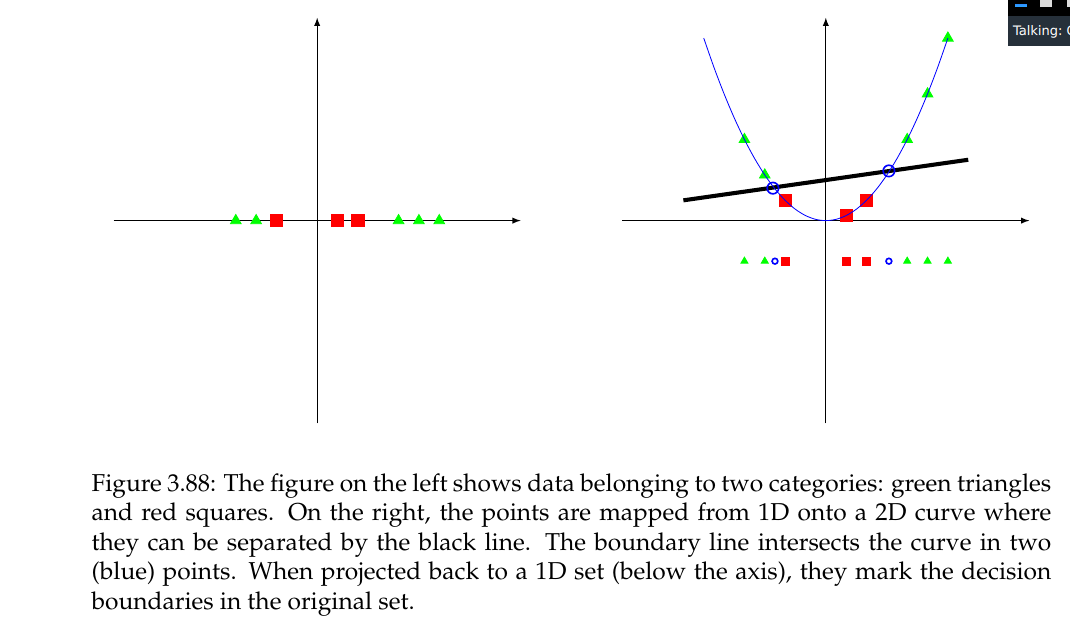

En la grafica de arriba tenemos una serie de puntos $x^{(1)}, x^{(2)}, \cdots, x^{(m)}$ que **no son linealmente separables** en 1D (eje $x$. El truco del **kernel** consiste en **backproject** (proyectar hacia arriba) los puntos a una dimension mayor. En este
caso sobre una parabola $y=x^2$

$$ x^{(1)} \to (x^{(1)}, {(x^{(1)})}^2)$$
$$ x^{(2)} \to (x^{(2)}, {(x^{(2)})}^2)$$
$$\vdots$$
$$ x^{(m)} \to (x^{(m)}, {(x^{(m)})}^2)$$

En 2D los puntos sin **linealmente separables** (ver la linea que los separa arriba. Se puede usar el SVM tradicional (sobre hiperplanos) para separarlos y leugo se proyectan a 1D (borrando la segunda coordenada).

Que pasa si todos los puntos estan a un solo lado del eje.
Por ejemplo en la siguiente figura.

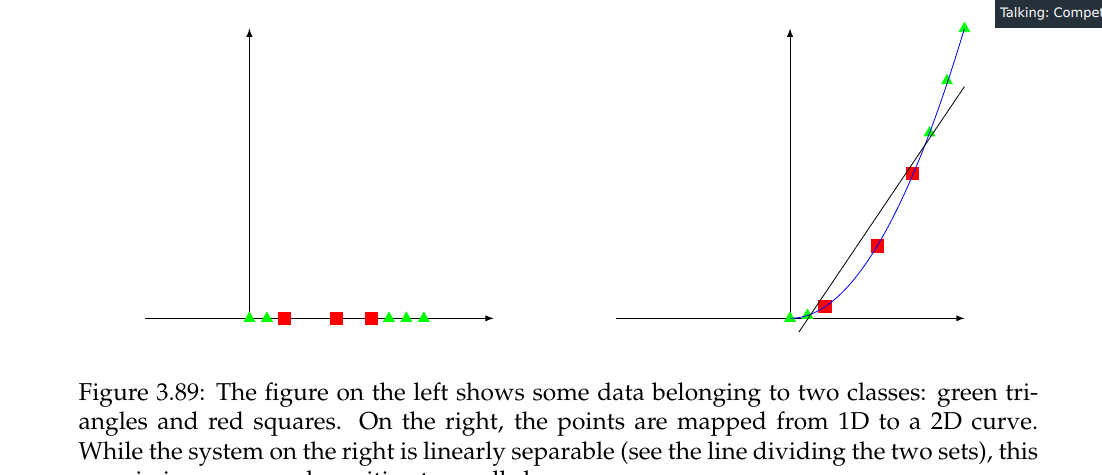

En el ejemplo de la Figura 3.89 los puntos (datos) son linelmente separables en el espacio 2D (backprojected) pero con un margen muy pequenho. Aca es donde la regularizacion de datos (remover la media) presta muy buen servicio.


Matematicamente si $\mu = \frac{1}{m} \sum_{i=1}^m x_i$
entonces los datos los cambiamos de la siguiente forma

$$x_i \to x_i - \mu $$
donde $i=1,2, \cdots, m$.

En este caso los pasos del algoritmo son:

1. Remover la media
$$x_i \to x_i - \mu $$
donde $i=1,2, \cdots, m$.

2. Mapear (kernel) los datos a una dimension superior
$$[(x_i - \mu), (x_i-\mu)^2] $$

3. Encontrar el "boundary line" $b_i$, usando SVM regular.

4. Proyectar a 1D, removiendo la segunda coordenada.

4. Sumar la media que se resto antes.
$$x_i \to x_i + \mu $$
donde $i=1,2, \cdots, m$.
Lo mismo para el **boundary line**, $b_i + \mu$

Que pasa si los datos estan en 2D? Ver grafica abajo.

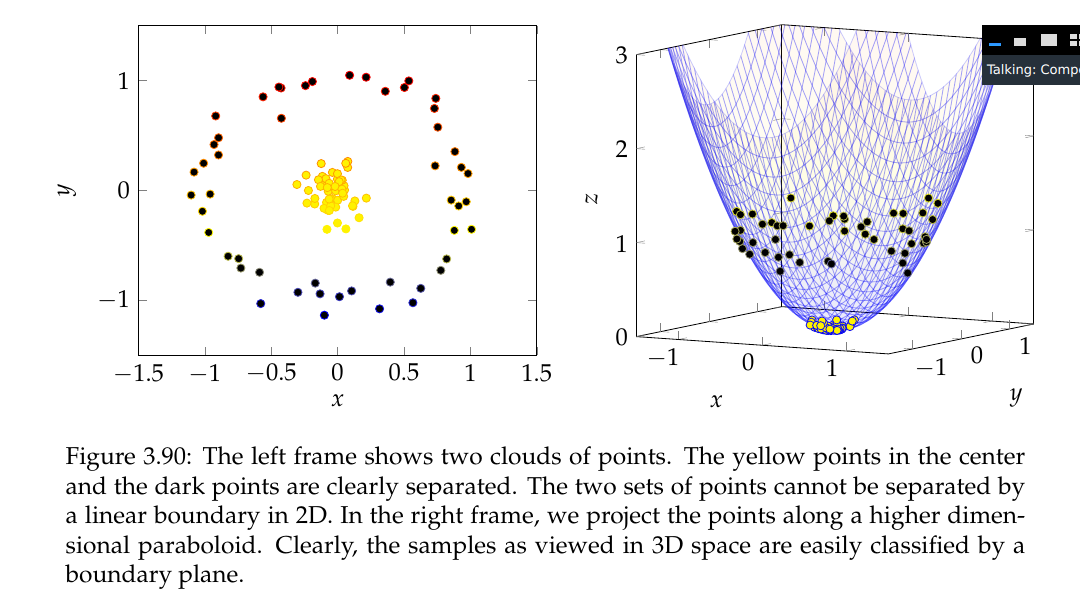

En este caso a cada punto $(x_1^{(i)}, x_2^{(i)})$
se le manda al espacio 3D con la funcion $z^2 = x^2 + y^2$,
o sea

$$(x_1^{(i)}, x_2^{(i)}, (x_1^{(i)})^2 + (x_2^{(i)})^2 \in \mathbb{R}^3 $$
Lo mismo se deben centrar los datos removiendo las medias
$(\mu_x, mu_y)$ y aplicar el mismo algoritmo de arriba.



La ultima grafica se obtuvo con un kernel Gaussiano. Ya veremos
en la proxima clase que es un kernel Gaussiano.
$$\mathrm{e}^{-\frac12 (x^2 + y^2)} $$



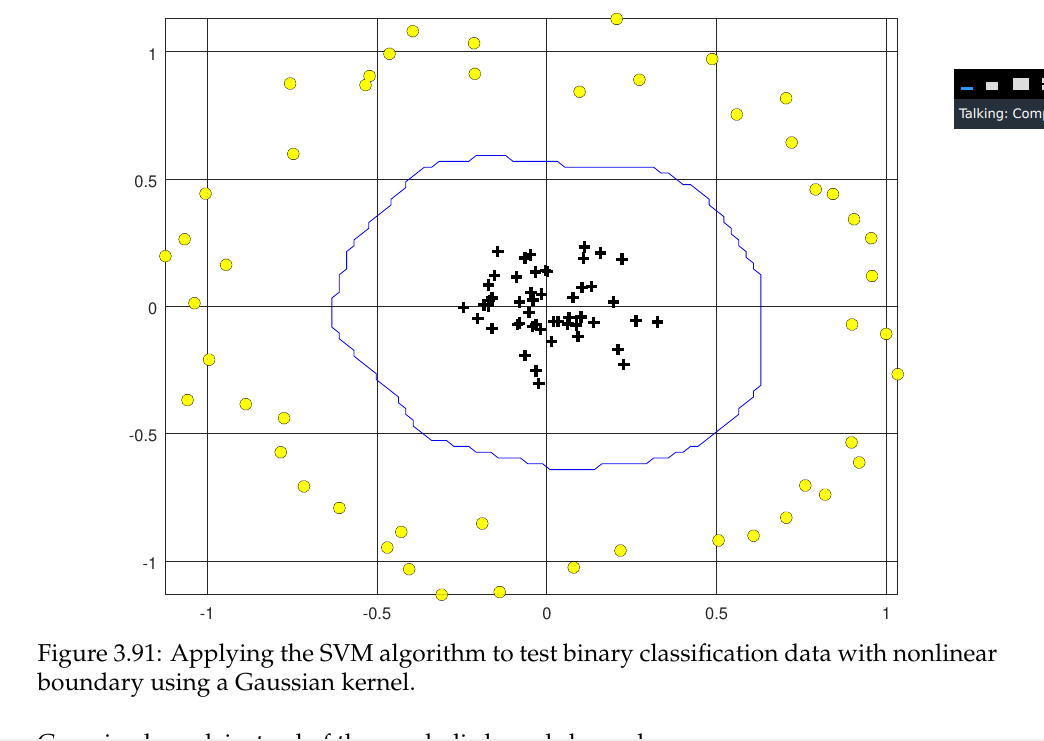

## Proxima clase: Kernel Trick (Isabelle Guyon).